In [1]:
library('scales')
library("ggplot2")
library(ggrepel)
set.seed(42)

In [2]:
require(proto)

#' Plot data ellipses.
#'
#' The method for calculating the ellipses has been modified from
#' \code{car::ellipse} (Fox and Weisberg, 2011)
#'
#' @references John Fox and Sanford Weisberg (2011). An {R} Companion to
#'   Applied Regression, Second Edition. Thousand Oaks CA: Sage. URL:
#'   \url{http://socserv.socsci.mcmaster.ca/jfox/Books/Companion}
#' @param level The confidence level at which to draw an ellipse (default is 0.95),
#'   or, if \code{type="euclid"}, the radius of the circle to be drawn.
#' @param type The type of ellipse.
#'   The default \code{"t"} assumes a multivariate t-distribution, and
#'   \code{"norm"} assumes a multivariate normal distribution.
#'   \code{"euclid"} draws a circle with the radius equal to \code{level},
#'   representing the euclidean distance from the center.
#'   This ellipse probably won't appear circular unless \code{coord_fixed()} is applied.
#' @param segments The number of segments to be used in drawing the ellipse.
#' @inheritParams layer
#' @inheritParams geom_point
#' @export
#' @examples
#' ggplot(faithful, aes(waiting, eruptions)) +
#'   geom_point() +
#'   stat_ellipse()
#'
#' ggplot(faithful, aes(waiting, eruptions, color = eruptions > 3)) +
#'   geom_point() +
#'   stat_ellipse()
#'
#' ggplot(faithful, aes(waiting, eruptions, color = eruptions > 3)) +
#'   geom_point() +
#'   stat_ellipse(type = "norm", linetype = 2) +
#'   stat_ellipse(type = "t")
#'
#' ggplot(faithful, aes(waiting, eruptions, color = eruptions > 3)) +
#'   geom_point() +
#'   stat_ellipse(type = "norm", linetype = 2) +
#'   stat_ellipse(type = "euclid", level = 3) +
#'   coord_fixed()
#'
#' ggplot(faithful, aes(waiting, eruptions, fill = eruptions > 3)) +
#'   stat_ellipse(geom = "polygon")
stat_ellipse <- function(mapping = NULL, data = NULL,
                         geom = "path", position = "identity",
                         ...,
                         type = "t",
                         level = 0.95,
                         segments = 51,
                         na.rm = FALSE,
                         show.legend = NA,
                         inherit.aes = TRUE) {
  layer(
    data = data,
    mapping = mapping,
    stat = StatEllipse,
    geom = geom,
    position = position,
    show.legend = show.legend,
    inherit.aes = inherit.aes,
    params = list(
      type = type,
      level = level,
      segments = segments,
      na.rm = na.rm,
      ...
    )
  )
}

#' @rdname ggplot2-ggproto
#' @format NULL
#' @usage NULL
#' @export
StatEllipse <- ggproto("StatEllipse", Stat,
  required_aes = c("x", "y"),

  compute_group = function(data, scales, type = "t", level = 0.95,
                           segments = 51, na.rm = FALSE) {
    calculate_ellipse(data = data, vars = c("x", "y"), type = type,
                      level = level, segments = segments)
  }
)

calculate_ellipse <- function(data, vars, type, level, segments){
  dfn <- 2
  dfd <- nrow(data) - 1

  if (!type %in% c("t", "norm", "euclid")) {
    message("Unrecognized ellipse type")
    ellipse <- rbind(as.numeric(c(NA, NA)))
  } else if (dfd < 3) {
    message("Too few points to calculate an ellipse")
    ellipse <- rbind(as.numeric(c(NA, NA)))
  } else {
    if (type == "t") {
      v <- MASS::cov.trob(data[,vars])
    } else if (type == "norm") {
      v <- stats::cov.wt(data[,vars])
    } else if (type == "euclid") {
      v <- stats::cov.wt(data[,vars])
      v$cov <- diag(rep(min(diag(v$cov)), 2))
    }
    shape <- v$cov
    center <- v$center
    chol_decomp <- chol(shape)
    if (type == "euclid") {
      radius <- level/max(chol_decomp)
    } else {
      radius <- sqrt(dfn * stats::qf(level, dfn, dfd))
    }
    angles <- (0:segments) * 2 * pi/segments
    unit.circle <- cbind(cos(angles), sin(angles))
    ellipse <- t(center + radius * t(unit.circle %*% chol_decomp))
  }

  ellipse <- as.data.frame(ellipse)
  colnames(ellipse) <- vars
  ellipse
}

rangescale <- function(X) {

	Xmax <- apply(X, 2, max)
	Xscaled = scale(X, scale=Xmax, center=T)

	return(Xscaled)
}

Loading required package: proto


In [45]:
df = read.csv("gene_TPM_matrix.csv")
df

X,gene_name,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6
ENSMUSG00000028185,Dnase2b,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000028186,Uox,0.00000,0.000000,0.000000,0.141699,0.017089,0.000000
MSTRG.43944,-,0.00000,0.744820,0.000000,0.000000,0.544469,15.654655
MSTRG.47095,AC132444.1,0.00000,5.693029,0.471422,0.404919,0.146163,8.114763
ENSMUSG00000050776,Olfr1317,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000083764,Gm11516,0.00000,0.000000,0.030438,0.000000,0.000000,0.000000
MSTRG.44224,.,0.00000,0.440636,3.178054,3.323163,1.968958,0.000000
MSTRG.10383,4933436F18Rik,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000035427,Mageb4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000035420,Fam170a,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
df[,3:8]

Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6
0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00000,0.000000,0.000000,0.141699,0.017089,0.000000
0.00000,0.744820,0.000000,0.000000,0.544469,15.654655
0.00000,5.693029,0.471422,0.404919,0.146163,8.114763
0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00000,0.000000,0.030438,0.000000,0.000000,0.000000
0.00000,0.440636,3.178054,3.323163,1.968958,0.000000
0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
data = data.matrix(df[,3:8])

In [48]:
data = t(data)

In [49]:
data = data[,apply(data, 2, var, na.rm=TRUE) != 0]
data = rangescale(data)

In [50]:
pca = prcomp(data)

sum_pca = summary(pca)

Too few points to calculate an ellipse
Too few points to calculate an ellipse


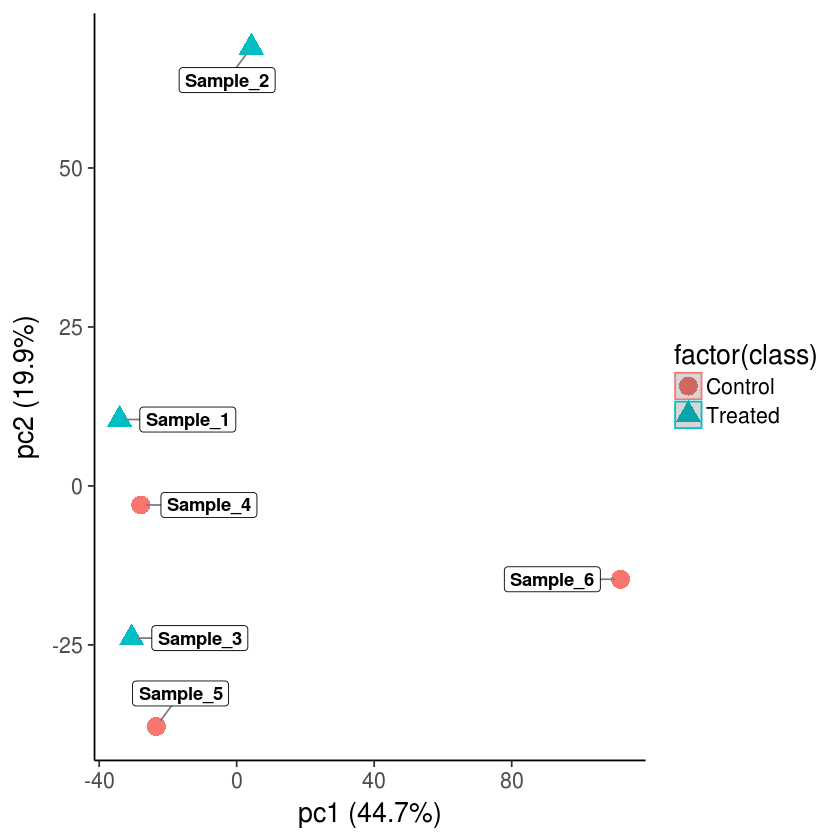

In [51]:
pc_data_frame = data.frame(pc1 = pca$x[,1],pc2 = pca$x[,2],pc3 = pca$x[,3],class=c("Treated","Treated","Treated","Control","Control","Control"),label=c("Sample_1","Sample_2","Sample_3","Sample_4","Sample_5","Sample_6"))
b=ggplot(pc_data_frame) +
  geom_point(aes(x=pc1, y=pc2, color=factor(class),shape=factor(class)), size=5) +
  # geom_text(aes(x=pc1, y=pc2,label=class3),check_overlap = TRUE,vjust = 2) + 
    geom_label_repel(
    aes(x=pc1, y=pc2,label=label),
    fontface = 'bold', color = 'black',
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.5, "lines"),
    segment.color = 'grey50'
  ) +
  theme_classic(base_size = 16)+
  # geom_text_repel(aes(label=class3)) + 
  # guides(colour=FALSE)+
  # xlim(c(-30, 55))+
  # ylim(c(-45, 35))+
  stat_ellipse(aes(x=pc1,y=pc2,colour=factor(class)),
               geom="polygon", level=0.8, alpha=0.2)+
	xlab(paste("pc1 (",percent(sum_pca$importance[2,1]),")",sep = ""))+ ylab(paste("pc2 (",percent(sum_pca$importance[2,2]),")",sep = ""))

print (b)

In [52]:
ggsave("Liu_pca_1_2.png")

Saving 6.67 x 6.67 in image
Too few points to calculate an ellipse
Too few points to calculate an ellipse


Too few points to calculate an ellipse
Too few points to calculate an ellipse
Saving 6.67 x 6.67 in image
Too few points to calculate an ellipse
Too few points to calculate an ellipse


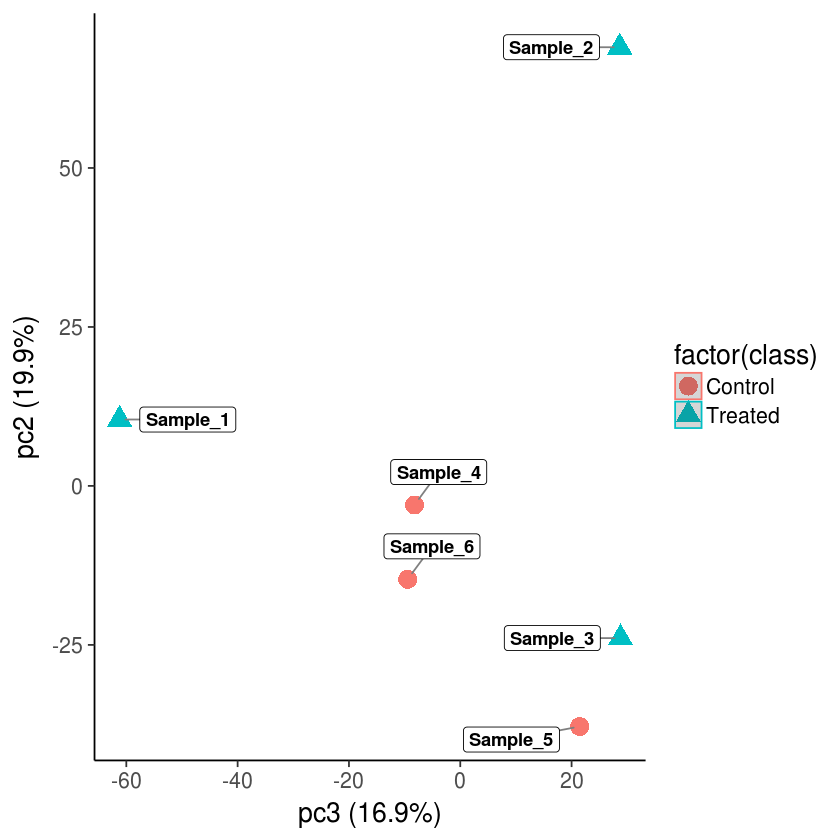

In [53]:
b=ggplot(pc_data_frame) +
  geom_point(aes(x=pc3, y=pc2, color=factor(class),shape=factor(class)), size=5) +
  # geom_text(aes(x=pc1, y=pc2,label=class3),check_overlap = TRUE,vjust = 2) + 
    geom_label_repel(
    aes(x=pc3, y=pc2,label=label),
    fontface = 'bold', color = 'black',
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.5, "lines"),
    segment.color = 'grey50'
  ) +
  theme_classic(base_size = 16)+
  # geom_text_repel(aes(label=class3)) + 
  # guides(colour=FALSE)+
  # xlim(c(-30, 55))+
  # ylim(c(-45, 35))+
  stat_ellipse(aes(x=pc3,y=pc2,colour=factor(class)),
               geom="polygon", level=0.8, alpha=0.2)+
	xlab(paste("pc3 (",percent(sum_pca$importance[2,3]),")",sep = ""))+ ylab(paste("pc2 (",percent(sum_pca$importance[2,2]),")",sep = ""))

print (b)
ggsave("Liu_pca_2_3.png")

Too few points to calculate an ellipse
Too few points to calculate an ellipse
Saving 6.67 x 6.67 in image
Too few points to calculate an ellipse
Too few points to calculate an ellipse


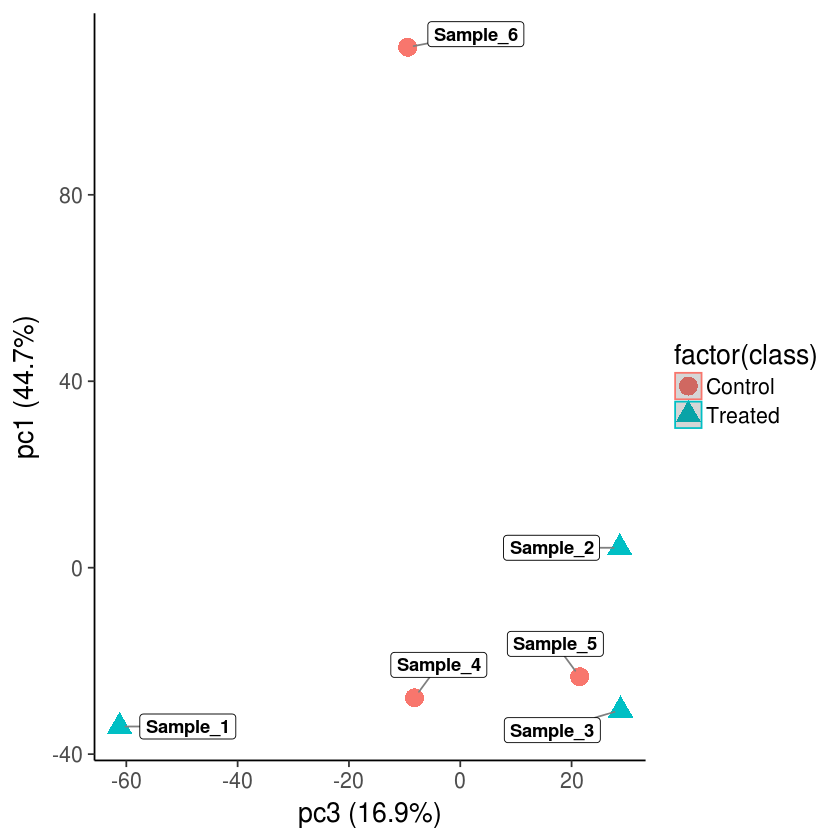

In [66]:
b=ggplot(pc_data_frame) +
  geom_point(aes(x=pc3, y=pc1, color=factor(class),shape=factor(class)), size=5) +
  # geom_text(aes(x=pc1, y=pc2,label=class3),check_overlap = TRUE,vjust = 2) + 
    geom_label_repel(
    aes(x=pc3, y=pc1,label=label),
    fontface = 'bold', color = 'black',
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.5, "lines"),
    segment.color = 'grey50'
  ) +
  theme_classic(base_size = 16)+
  # geom_text_repel(aes(label=class3)) + 
  # guides(colour=FALSE)+
  # xlim(c(-30, 55))+
  # ylim(c(-45, 35))+
  stat_ellipse(aes(x=pc3,y=pc1,colour=factor(class)),
               geom="polygon", level=0.8, alpha=0.2)+
	xlab(paste("pc3 (",percent(sum_pca$importance[2,3]),")",sep = ""))+ ylab(paste("pc1 (",percent(sum_pca$importance[2,1]),")",sep = ""))

print (b)
ggsave("Liu_pca_1_3.png")

Too few points to calculate an ellipse
Too few points to calculate an ellipse
Saving 6.67 x 6.67 in image
Too few points to calculate an ellipse
Too few points to calculate an ellipse


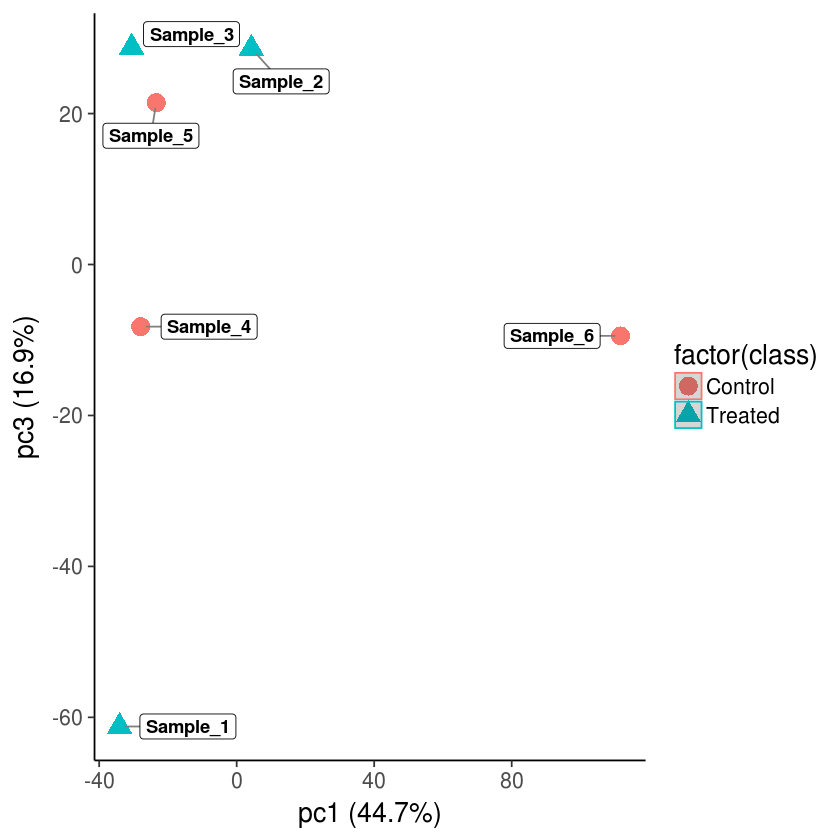

In [67]:
b=ggplot(pc_data_frame) +
  geom_point(aes(x=pc1, y=pc3, color=factor(class),shape=factor(class)), size=5) +
  # geom_text(aes(x=pc1, y=pc2,label=class3),check_overlap = TRUE,vjust = 2) + 
    geom_label_repel(
    aes(x=pc1, y=pc3,label=label),
    fontface = 'bold', color = 'black',
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.5, "lines"),
    segment.color = 'grey50'
  ) +
  theme_classic(base_size = 16)+
  # geom_text_repel(aes(label=class3)) + 
  # guides(colour=FALSE)+
  # xlim(c(-30, 55))+
  # ylim(c(-45, 35))+
  stat_ellipse(aes(x=pc1,y=pc3,colour=factor(class)),
               geom="polygon", level=0.8, alpha=0.2)+
	xlab(paste("pc1 (",percent(sum_pca$importance[2,1]),")",sep = ""))+ ylab(paste("pc3 (",percent(sum_pca$importance[2,3]),")",sep = ""))

print (b)
ggsave("Liu_pca_1_3.png")

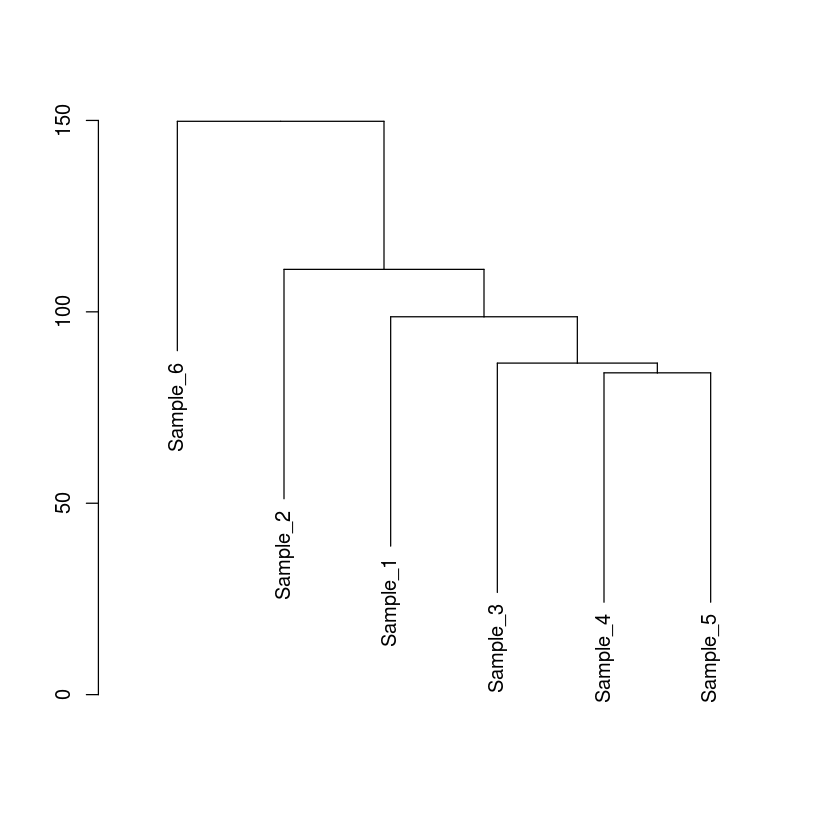

In [62]:
label=c("Sample_1","Sample_2","Sample_3","Sample_4","Sample_5","Sample_6")
rownames(data) <- label 
d=dist(data,method="euclidean")
hc <- hclust(d, "average")   
dend = as.dendrogram(hc,hang=0.4)          # heirarchal clustering
plot(dend)

png 
  2

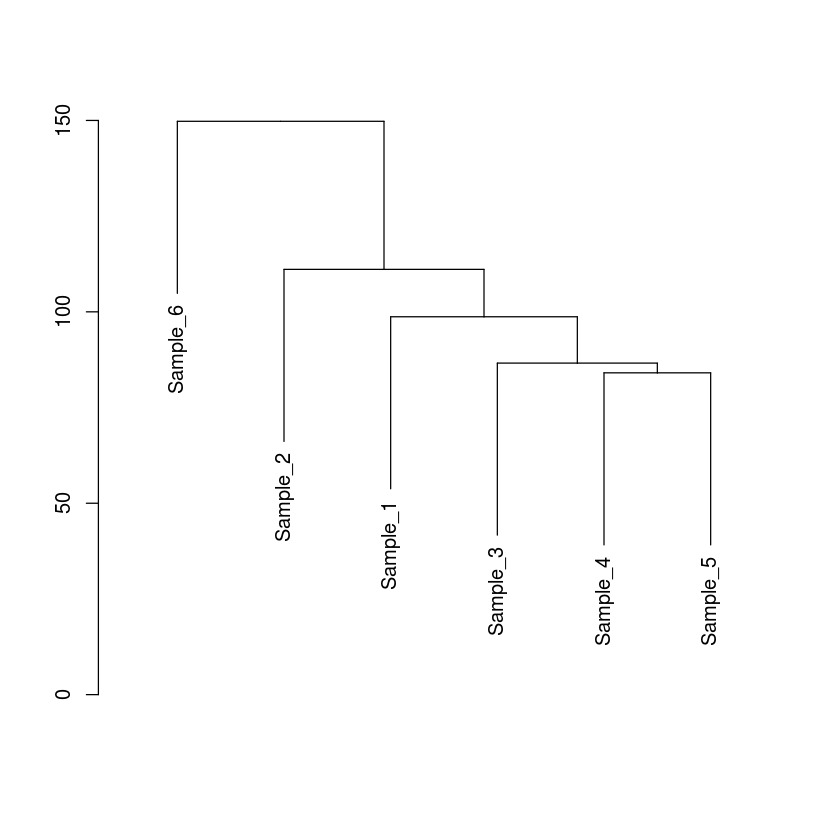

In [70]:
library(magrittr)
library(dendextend)
label=c("Sample_1","Sample_2","Sample_3","Sample_4","Sample_5","Sample_6")
rownames(data) <- label 
d=dist(data,method="euclidean")
hc <- hclust(d, "average")   
dend = as.dendrogram(hc,hang=0.3)          # heirarchal clustering

new_label = labels(dend)
color_group = c("cyan","brown1","brown1","brown1","cyan","cyan")
shape_group = c(17,19,19,19,17,17)
png("Liu.hclust.average.png",width = 800, height = 800,res=72) 
dend %>% set("leaves_cex", 2) %>% set("leaves_pch", shape_group) %>% 
set("labels_col", color_group) %>% set("labels_cex", 2) %>%
plot(main = "Sample relationship dendrogram")
cols <- c("cyan","brown1")
shapes = c(17,19)
legend("topright", legend = c("Control","Treated"),
       fill = cols, border = cols, bty = "n")
legend("bottomright", legend = c("Control","Treated"), pch = shapes)

dev.off()
plot(dend)